In [1]:
from gates import *
from states import *
from measurements import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [7]:
batch_size = 100
n_photons = 20
num_params = 6
initial_state = np.zeros((batch_size, n_photons))
initial_state[:, 3] = 1.
params = np.zeros(num_params)
params[0] = 1.
# gamma, r1, phi1, r2, phi2, theta1
lr = 1e-2 # learning rate

In [8]:
def circuit(init_state, params, batch_size, num_params, n_photons, lr):
    random_numbers = np.random.randn(num_params*batch_size).reshape(batch_size, num_params)
    gate1 = V_gate(params[0] + random_numbers[:,0], n_photons)   # cubic gate
    gate2 = S_gate(params[1] + random_numbers[:,1], params[2] + random_numbers[:,2], n_photons) # squeezing
    gate3 = D_gate(params[3] + random_numbers[:,3], params[4] + random_numbers[:,4], n_photons) # displacement
    gate4 = R_gate(params[5] + random_numbers[:,5], n_photons) # rotation
    state = np.einsum('ijk,ik->ij', gate1, init_state)
    state = np.einsum('ijk,ik->ij', gate2, state)
    state = np.einsum('ijk,ik->ij', gate3, state)
    state = np.einsum('ijk,ik->ij', gate4, state)
    data_X = meas_X(state, n_photons)
    data_P = meas_P(state, n_photons)
    return random_numbers, data_X, data_P

In [9]:
R, X, P = circuit(initial_state, params, batch_size, num_params, n_photons, lr)

(array([ 1379.,  4270., 12442.,  9456., 10795., 21974.,  3269., 11255.,
        17766.,  7394.]),
 array([-6.87731227, -5.46985301, -4.06239376, -2.65493451, -1.24747525,
         0.159984  ,  1.56744326,  2.97490251,  4.38236176,  5.78982102,
         7.19728027]),
 <a list of 10 Patch objects>)

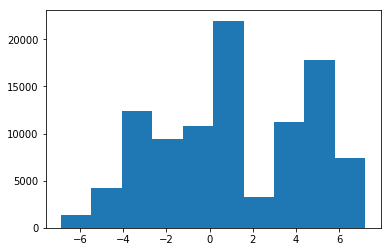

In [10]:
plt.hist(P[0])

(array([ 2897., 16089., 16007.,  9972., 13322., 16756.,  9737.,  5364.,
         6868.,  2988.]),
 array([-7.35326467, -5.90580942, -4.45835416, -3.01089891, -1.56344366,
        -0.1159884 ,  1.33146685,  2.77892211,  4.22637736,  5.67383262,
         7.12128787]),
 <a list of 10 Patch objects>)

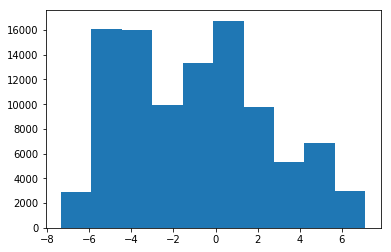

In [11]:
plt.hist(X[0])